### import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

#### importing 12 months of data in to single  CSV file

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

all_months_data = pd.DataFrame()

files = [files for files in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df]) 

all_months_data.to_csv('all_data.csv' , index=False)

In [3]:
all_data = pd.read_csv('./all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Cleaning the data

In [4]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Looks like we have 545 rows that are blank

In [5]:
all_data = all_data.dropna(how='all')

In [6]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### removing duplicates

In [7]:
## all_data.drop_duplicates()

In [8]:
all_data.to_csv('all_data.csv' , index=False)

In [9]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
all_data = all_data[all_data['Order Date'] != 'Order Date']

In [11]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months'] = all_data['Months'].astype('int32')

In [12]:
all_data['City'] = all_data['Purchase Address'].apply(
    lambda x: x.split(',')[1].strip() + ' ' + x.split(',')[2].strip()[:2]
)

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City NY
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta GA


In [14]:
print(all_data.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Months', 'City'],
      dtype='object')


In [15]:
all_data.head(12000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City NY
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta GA
...,...,...,...,...,...,...,...,...
12057,307162,Wired Headphones,2,11.99,12/30/19 11:01,"588 Park St, Los Angeles, CA 90001",12,Los Angeles CA
12058,307163,27in FHD Monitor,1,149.99,12/22/19 10:50,"520 Johnson St, Portland, ME 04101",12,Portland ME
12059,307164,Bose SoundSport Headphones,2,99.99,12/27/19 15:45,"26 Wilson St, Dallas, TX 75001",12,Dallas TX
12060,307165,27in FHD Monitor,1,149.99,12/02/19 15:53,"716 Hickory St, Portland, OR 97035",12,Portland OR


In [16]:
all_data.to_csv('all_data.csv' , index=False)

##### Lets change data types of column to the suitable data types

In [17]:
 all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
 all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [18]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City NY,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City NY,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City NY,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco CA,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta GA,11.95


## Data Exploration!


### What was the best month for sales? How much was earned that month?

In [37]:
result = all_data.groupby('Months').sum()['Sales']

months = range(1,13)
plt.bar(months , result , color = 'green')
plt.xlabel('Months')
plt.ylabel('Sales in US ($)')
plt.xticks(months)

plt.show()

TypeError: datetime64 type does not support sum operations

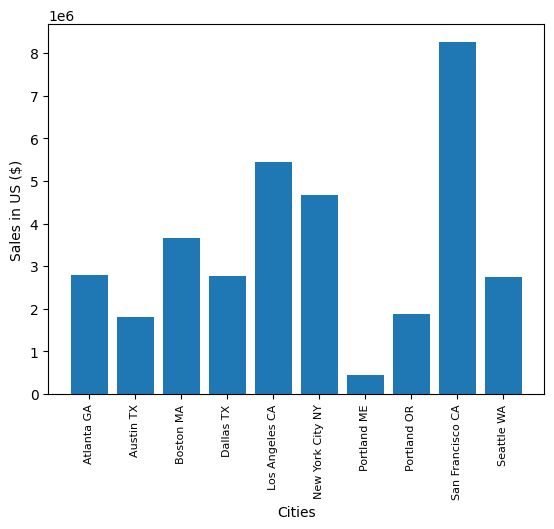

In [24]:
import matplotlib.pyplot as plt

city_result = all_data.groupby('City')['Sales'].sum()

plt.bar(city_result.index, city_result)

plt.xlabel('Cities')
plt.ylabel('Sales in US ($)')
plt.xticks(rotation='vertical', size=8)  # Rotate x-axis labels for readability
plt.show()


In [31]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City,Sales,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City NY,1700.00,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City NY,600.00,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City NY,11.95,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco CA,149.99,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta GA,11.95,12


In [34]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City NY,1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City NY,600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City NY,11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco CA,149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta GA,11.95,12,38,1


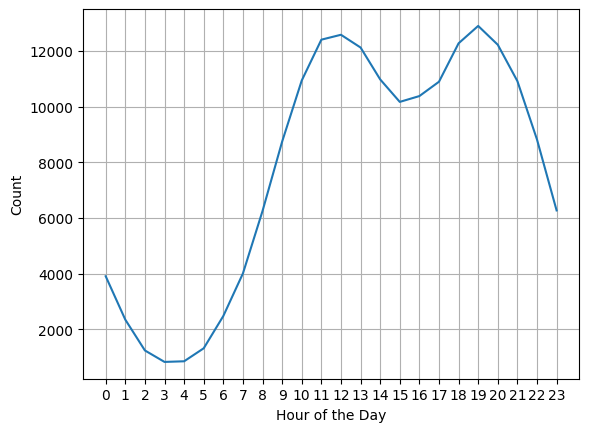

In [36]:
import matplotlib.pyplot as plt

hourly_data = all_data.groupby(['Hour']).count()['Count']

plt.plot(hourly_data.index, hourly_data.values)


plt.xticks(hourly_data.index)

plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid()

plt.show()
